In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings

In [2]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("cleaned_population.csv")
cleaned_rental_df = pd.read_csv("cleaned_rental.csv")
cleaned_housing_df = pd.read_csv("cleaned_inventory.csv")

#top&bottom csvs
T_pop = pd.read_csv("mostchangedpop.csv")
B_pop = pd.read_csv("leastchangedpop.csv")
T_house = pd.read_csv("top10inventory.csv")
B_house = pd.read_csv("bottom10inventory.csv")
T_rental = pd.read_csv("top10rental.csv")
B_rental = pd.read_csv("bottom10rental.csv")

#data set with changing rates
population_df = pd.read_csv("sorted_population.csv")
rental_df = pd.read_csv("rental_rate.csv")
housing_df = pd.read_csv("housing_rate.csv")

#all house price csv 
house_df = pd.read_csv("HomePriceFull.csv")

In [3]:
#renaming the values and columns names in the dataframe
house_df = house_df.rename(columns={"RegionName":"City"})
# house_df.drop(house_df.iloc[:, 5:269], inplace = True, axis = 1) 
# house_df.drop(house_df.iloc[:, 0:2], inplace = True, axis = 1) 
# del house_df["RegionType"]
# house_df['City'] = house_df['City'].str.split(',').str[0]
# house_df = house_df.replace({"Los Angeles-Long Beach-Anaheim": "Los Angeles",
#                                 "Dallas-Fort Worth":"Dallas",
#                                  "Miami-Fort Lauderdale":"Miami",
#                                  "Minneapolis-St Paul" : "Minneapolis",
#                                  "Louisville-Jefferson County":"Louisville"})

In [12]:
#finding the picked cities from the dataframe
df1 = house_df.loc[(house_df["City"]=="Boston") & (house_df["State"]=="MA")]
df2 = house_df.loc[house_df["City"]=="Salt Lake City"]
df3 = house_df.loc[(house_df["City"]=="Minneapolis") & (house_df["State"]=="MN")]
df4 = house_df.loc[house_df["City"]=="Seattle"]
df5 = house_df.loc[(house_df["City"]=="Miami") & (house_df["State"]=="FL")]
df6 = house_df.loc[(house_df["City"]=="Atlanta") & (house_df["State"]=="GA")]
df7 = house_df.loc[(house_df["City"]=="Columbus") & (house_df["State"]=="OH")]
df8 = house_df.loc[(house_df["City"]=="Columbus") & (house_df["State"]=="GA")]
df9 = house_df.loc[(house_df["City"]=="Fayetteville") & (house_df["State"]=="NC")]
df10 = house_df.loc[(house_df["City"]=="Louisville") & (house_df["State"]=="KY")]
df11 = house_df.loc[(house_df["City"]=="Portland") & (house_df["State"]=="OR")]
df12 = house_df.loc[(house_df["City"]=="San Jose") & (house_df["State"]=="CA")]
df13 = house_df.loc[house_df["City"]=="New York"]
df14 = house_df.loc[house_df["City"]=="Oklahoma City"]
df15 = house_df.loc[(house_df["City"]=="Denver") & (house_df["State"]=="CO")]
df16 = house_df.loc[(house_df["City"]=="Kansas City") & (house_df["State"]=="KS")]
df17 = house_df.loc[(house_df["City"]=="Frisco") & (house_df["State"]=="TX")]
df18 = house_df.loc[house_df["City"]=="Irvine"]
df19 = house_df.loc[house_df["City"]=="Honolulu"]

In [13]:
#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18]
result_df = pd.concat(frames).reset_index(drop=True)

In [14]:
#selecting house price data from 2018 to 2020 for each city
Boston = result_df.iloc[0, 272:]
Salt_Lake_City = result_df.iloc[1, 272:]
Minneapolis = result_df.iloc[2, 272:]
Seattle = result_df.iloc[3, 272:]
Miami = result_df.iloc[4, 272:]
Atlanta = result_df.iloc[5, 272:]
ColumbusOH = result_df.iloc[6, 272:]
ColumbusGA = result_df.iloc[7, 272:]
FayettevilleNC = result_df.iloc[8, 272:]
Louisville = result_df.iloc[9, 272:]
PortlandOR = result_df.iloc[10, 272:]
SanJose = result_df.iloc[11, 272:]
NewYork = result_df.iloc[12, 272:]
OklahomaCity = result_df.iloc[13, 272:]
Denver = result_df.iloc[14, 272:]
KansasCity = result_df.iloc[15, 272:]

<IPython.core.display.Javascript object>


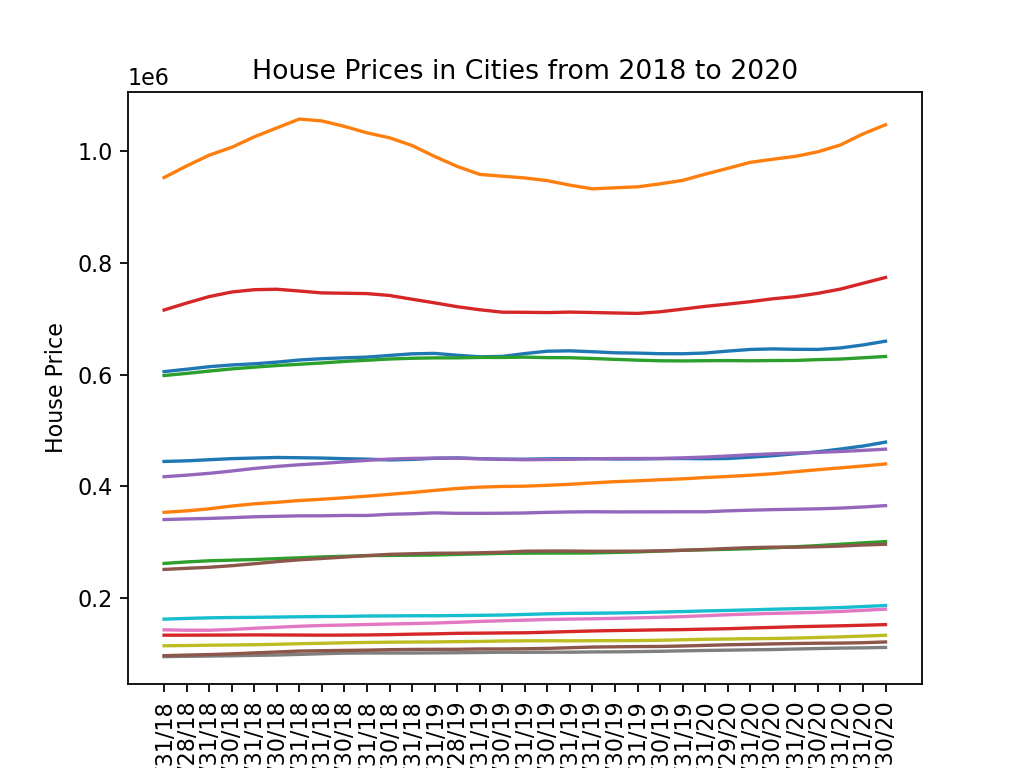

In [15]:
#plotting the house price of each city from 2018 to 2020
%matplotlib notebook
plt.plot(Boston, label="Boston")
plt.plot(Salt_Lake_City, label="Salt Lake City")
plt.plot(Minneapolis, label="Minneapolis")
plt.plot(Seattle, label="Seattle")
plt.plot(Miami, label="Miami")
plt.plot(Atlanta, label="Atlanta")
plt.plot(ColumbusOH, label="Columbus,OH")
plt.plot(ColumbusGA, label="Columbus,GA")
plt.plot(FayettevilleNC, label="Fayetteville,NC")
plt.plot(Louisville, label="Louisville")
plt.plot(PortlandOR, label="Portland,OR")
plt.plot(SanJose, label="SanJose")
plt.plot(NewYork, label="New York")
plt.plot(OklahomaCity, label="Oklahoma City")
plt.plot(Denver, label="Denver")
plt.plot(KansasCity, label="KansasCity")

plt.title("House Prices in Cities from 2018 to 2020")
plt.xlabel("Months")
plt.ylabel("House Price")
plt.xticks(rotation = 'vertical')
plt.show()

In [16]:
result_df.columns

Index(['RegionID', 'SizeRank', 'City', 'RegionType', 'StateName', 'State',
       'Metro', 'CountyName', '1/31/96', '2/29/96',
       ...
       '12/31/19', '1/31/20', '2/29/20', '3/31/20', '4/30/20', '5/31/20',
       '6/30/20', '7/31/20', '8/31/20', '9/30/20'],
      dtype='object', length=305)

In [17]:
#calcuating yearl average of house price of each city
H2018 = ['City', 'State', '1/31/18', '2/28/18', '3/31/18', '4/30/18', '5/31/18',
       '6/30/18', '7/31/18', '8/31/18', '9/30/18', '10/31/18', '11/30/18', '12/31/18']
H2018 = result_df[H2018]
H2018["2018 Average"]=H2018.mean(axis=1)

H2019 = ['City', 'State', '1/31/19', '2/28/19', '3/31/19', '4/30/19', '5/31/19',
       '6/30/19', '7/31/19', '8/31/19', '9/30/19', '10/31/19', '11/30/19', '12/31/19']
H2019 = result_df[H2019]
H2019["2019 Average"]=H2019.mean(axis=1)

H2020 = ['City', 'State','1/31/20', '2/29/20', '3/31/20', '4/30/20', '5/31/20',
       '6/30/20', '7/31/20', '8/31/20', '9/30/20']
H2020 = result_df[H2020]
H2020["2020 Average"]=H2020.mean(axis=1)

#making dataframe
Havg_df = H2018[['City', 'State']]
Havg_df["2018 Average"] = H2018["2018 Average"]
Havg_df["2019 Average"] = H2019["2019 Average"]
Havg_df["2020 Average"] = H2020["2020 Average"]
Havg_df.head()

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')


<ipython-input-17-23f0f9444121>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2018["2018 Average"]=H2018.mean(axis=1)


In [18]:
#calculating yearly changing rate for each city

Hrating_df = H2018[['City', 'State']]
Hrating_df["Changing Rate 2018-2019"] = ((Havg_df["2019 Average"]- Havg_df["2018 Average"])/Havg_df["2019 Average"])*100
Hrating_df["Changing Rate 2019-2020"] = ((Havg_df["2020 Average"]- Havg_df["2019 Average"])/Havg_df["2020 Average"])*100
Hrating_df


<ipython-input-18-da1a36ca6794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hrating_df["Changing Rate 2018-2019"] = ((Havg_df["2019 Average"]- Havg_df["2018 Average"])/Havg_df["2019 Average"])*100


,City,State,Changing Rate 2018-2019,Changing Rate 2019-2020
0,Boston,MA,2.307307,1.431722
1,Salt Lake City,UT,7.840001,5.444049
2,Minneapolis,MN,3.549732,4.026592
3,Seattle,WA,-3.802071,3.890706
4,Miami,FL,2.071225,1.695174
5,Atlanta,GA,6.082571,2.893788
6,Columbus,OH,8.179832,7.112124
7,Columbus,GA,4.425242,4.993967
8,Fayetteville,NC,4.400259,4.367598
9,Louisville,KY,3.365296,5.181740


<IPython.core.display.Javascript object>


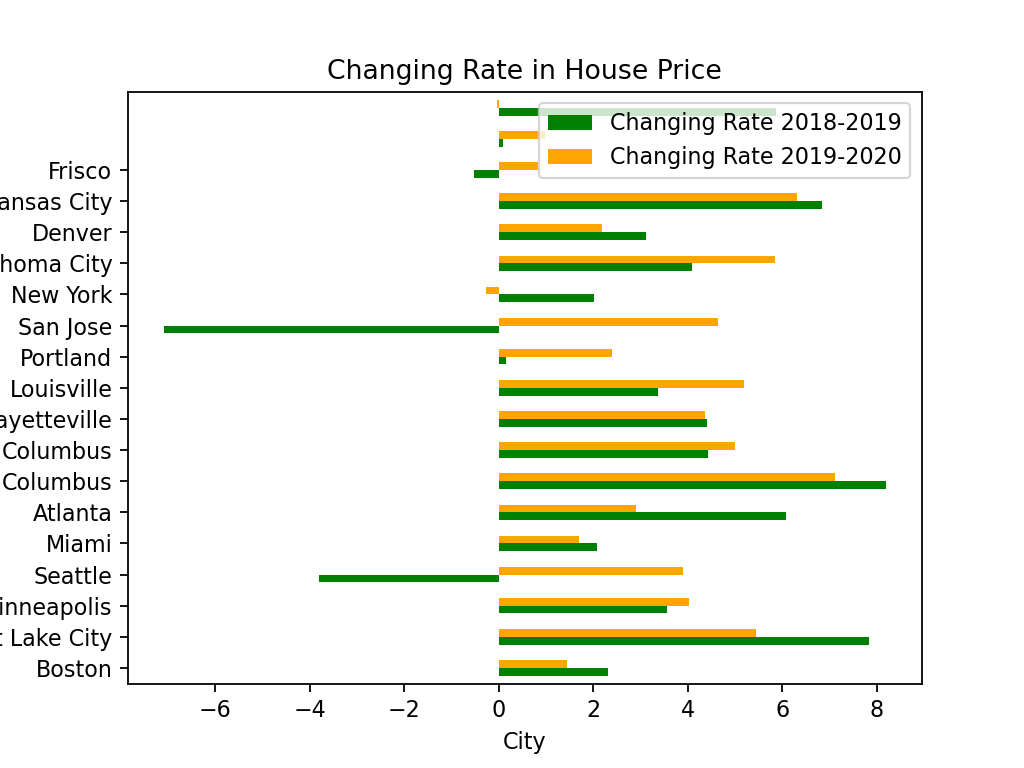

In [19]:
ax = Hrating_df.plot.barh(color=["green","orange"], rot=0)
ax.set_title("Changing Rate in House Price")
ax.set_xlabel("City")
ax.set_ylabel("Changing Rate in House Price")
x_axis = np.arange(Hrating_df["City"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(Hrating_df["City"]), rotation='horizontal')
plt.show()